# IN4080 Exercise 1.1

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
#from nltk.book import *
from nltk.corpus import brown
%matplotlib inline

In [2]:
nltk.download('brown'); nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /tmp/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /tmp/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

## 1.1a

In [3]:
conditions = ["news", "religion", "government", "fiction", "romance"]
events = ["he", "she", "her", "him", "it"] # remove "it"
gender = ["masculine", "feminine", "neuter"]

In [4]:
cfd = nltk.ConditionalFreqDist([
        (genre, word.lower())
        for genre in conditions
        for word in brown.words(categories=genre)
        if word.lower() in events])
cfd.tabulate(samples=events)

             he  she  her  him   it 
   fiction 1308  425  413  382  607 
government  169    1    3   26  324 
      news  642   77  121   93  478 
  religion  206   12    8   94  337 
   romance 1068  728  680  340  717 


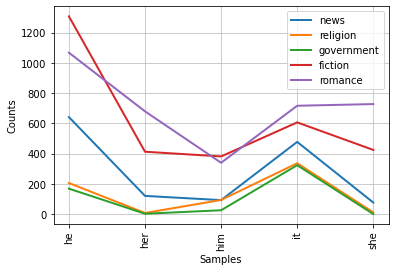

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
cfd.plot()

## 1.1b

First of all, what's most noticable is that the word "he" is most used. The reason for this is uncertain. However, it could be that the main character(s) in these generes are mostely male from a third person narrative. Because if it would have been a first person, narrative, it wouldn't make that much sense for the word "he" to dominate because the main character would be identifying himself as "I". Another reason it could be 3rd person is because, even though "he" is the most common pronoun, "him" is the least common. Unlike "she" and "her" who approx the same amoun of occurences.  

## 1.1c

In [6]:
forms = nltk.ConditionalFreqDist()

for condition in conditions:
    for word in brown.words(categories=condition):
        if word.lower() in events:
            if word.lower() in ["he", "she"]:
                forms[condition]["nominative"] += 1
            elif word.lower() in ["him", "her"]:
                forms[condition]["objective"] += 1

In [7]:
forms.tabulate()

           nominative  objective 
   fiction       1733        795 
government        170         29 
      news        719        214 
  religion        218        102 
   romance       1796       1020 


In [8]:
import pandas as pd
df = pd.DataFrame(cfd)
df = df.drop(["it"])

total = df.sum(axis = 1)
df["total"] = total.to_frame()

num_total = df.total.sum()
num_total

6796

In [9]:
# Temp
total

he     3393
him     935
she    1243
her    1225
dtype: int64

In [10]:
he  = total['he']  / num_total #No STRING, like df2
him = total['him'] / num_total
she = total['she'] / num_total
her = total['her'] / num_total

pronouns = [[he, him, she, her]]
#df2 = pd.DataFrame(pronouns, columns= list(map(str, pronouns)))
#df2 = pd.DataFrame(pronouns, columns= [[str(s) for s in sublist] for sublist in pronouns])
df2 = pd.DataFrame(pronouns, columns=["he", "him", "she", "her"])
pd.options.display.float_format = '{:,.6f}'.format
df2

,he,him,she,her
0,0.499264,0.137581,0.182902,0.180253


## 1.1d

In [11]:
tagged_brown_corpus = brown.tagged_words(categories=conditions, tagset='universal')
tagged_brown_corpus

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [12]:
tagged_brown_corpus_pron = [word.lower() for (word, tag) in tagged_brown_corpus if tag == 'PRON']
tagged_brown_corpus_pron[:5]

['it', 'it', 'them', 'them', 'it']

In [13]:
temp_name = nltk.pos_tag(tagged_brown_corpus_pron)

# she, he, her, him personal pronouns
# her, his, hers possesive pronouns 
gender_forms = ["he", "him", "his", "she", "her", "hers"]

tagged_words = [(word, tag) # Change name 
                for (word,tag) in temp_name
                    if word.lower() in gender_forms
                    if tag == 'PRP$'
                    or tag == 'PRP']

In [14]:
cfd2 = nltk.ConditionalFreqDist(tagged_words)
cfd2.tabulate()

     PRP PRP$ 
 he 3393    0 
her   39  397 
him  935    0 
his    0   17 
she 1243    0 


## 1.1d

In [15]:
df2 = pd.DataFrame(cfd2, columns=gender_forms)
#df2 = df2.drop(["it"])

total2 = df2.sum(axis = 1)
df2["total"] = total2.to_frame()

num_total2 = df2.total.sum()
num_total2

6024.0

In [16]:
df2
#total2

,he,him,his,she,her,hers,total
PRP,"3,393.000000",935.000000,NaN,"1,243.000000",39,NaN,"5,610.000000"
PRP$,NaN,NaN,17.000000,NaN,397,NaN,414.000000


In [17]:
he2  = df2['he'].PRP  / num_total
him2 = df2['him'].PRP / num_total
she2 = df2['she'].PRP / num_total
her2 = df2['her'].PRP / num_total

pronouns = [[he2, him2, she2, her2]]
df2 = pd.DataFrame(pronouns, columns=["he", "him", "she", "her"])
pd.options.display.float_format = '{:,.6f}'.format
df2

,he,him,she,her
0,0.499264,0.137581,0.182902,0.005739


## 1.1e

In [18]:
# Difference between 1.1c and 1.1d
cd1 = he - he2; cd2 = him - him2; cd3 = she - she2; cd4 = her - her2 
error_he = np.sqrt(cd1)**2; error_him = np.sqrt(cd2)**2; error_she = np.sqrt(cd3)**2; error_her = np.sqrt(cd4)**2

print(f"he: {error_he}, him: {error_him}, she: {error_she}, her: {error_her}")

he: 0.0, him: 0.0, she: 0.0, her: 0.1745144202472042


## 1.1f

## 1.1e

0.18025309005297233 0.005738669805768099


<BarContainer object of 2 artists>

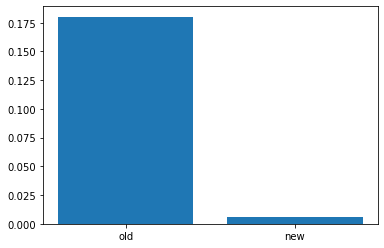

In [19]:
#ax = df2.plot.bar(rot=0)
#xb = np.linspace(0, total["her"], 101)
#xe = np.linspace(0, df2["her"].PRP, 101)
print(her, her2)
xb = np.linspace(0, her, 101)
xe = np.linspace(0, her2, 101)
plt.bar(["old", "new"],[her, her2])

## 1.1f

This is a tough one. The reason for this could be that since this is from arround the 1960s, most jobs were dominated by men. Especially the generes studied here (maybe not romance, and that's why the feminine pronoun is more common there). And because of this, we see so few instances of the feminine pronoun. But again, there are probably other factors as well. If I got to see the distribution of more modern data, maybe it would be easier to make a case for it being because of male dominance or not.

It this experiment, we see what needs to be done in order to properly analyse natural languages. We now that even a pronoun doesn't always tell us what we may seem. Why the data appears as it is, is also an entire study on its own.

We also see how far computers and technology has come in order to allow us to study huge databases of natural language data in such as short amount of time. Is it descriptive, or a determiner for example.

# Exercise 1.2

In [20]:
from urllib import request
import re

## 1.2a

In [21]:
open_text = request.urlopen("https://www.gutenberg.org/files/74/74-0.txt")
text = open_text.read().decode('utf8')

## 1.2b

In [22]:
gutenberg = re.search("(?<=HARTFORD, 1876)[\s\S]*CONCLUSION", text)[0] # Looking at the data between chapter I and the conclusion
#gutenberg = text[:-10]

## The reason I keep "chapter I" is because it would take too long to remove all the chapter headings
gutenberg = gutenberg[:-10] # conclusion part 
gutenberg = gutenberg.replace('.','') # remove dots
gutenberg = nltk.word_tokenize(gutenberg)

tokens = [g.lower() for g in gutenberg if g.isalpha()]
tokens[:10]

['chapter', 'i', 'tom', 'no', 'answer', 'tom', 'no', 'answer', 'what', 's']

## 1.2c

In this project, we are mostly interested in how the words are used and how often they appear. For this, we don't have much need for the punctuation marks. The only thing I did to handle punctuation marks was to replace them with an empty string.

## 1.2d

In [23]:
most_used_words = nltk.FreqDist(tokens).most_common(20)
#most_used_words_all = nltk.FreqDist(tokens)
all_used_words = nltk.FreqDist(tokens).items()
most_used_words[:4]

[('the', 3662), ('and', 2981), ('a', 1787), ('to', 1697)]

## 1.2e

In [24]:
df = pd.DataFrame(most_used_words, columns = ["word", "freq"])
df.head()

,word,freq
0,the,3662
1,and,2981
2,a,1787
3,to,1697
4,of,1424


In [25]:
def occurrences_from(n):
    if type(n) == int:
        return df_all.freq == n
    elif len(n) == 2:
        n0 = df_all.freq > n[0]
        n1 = df_all.freq < n[1]
        return n0 & n1
        
df_all = pd.DataFrame(all_used_words, columns = ["word", "freq"])   
df_all.loc[occurrences_from(10)]
df_all.loc[occurrences_from((11, 50))]
df_all.loc[occurrences_from((50, 100))]

,word,freq
14,old,94
28,put,57
31,under,86
39,thing,66
47,heart,65
...,...,...
1042,injun,66
1107,three,52
1110,such,68
1293,house,55


In [26]:
def more_than_n_occurrences(n):
    return df_all.freq > n

print(f"Number of rows with more than 100 occurrences: {len(df_all.loc[more_than_n_occurrences(100)])}")

Number of rows with more than 100 occurrences: 102


In [27]:
rep_10         = len(df_all.loc[occurrences_from((10))])
rep_11_50      = len(df_all.loc[occurrences_from((11, 50))])
rep_50_100     = len(df_all.loc[occurrences_from((50, 100))])
#between_51_100 = len(df_all.loc[occurrences_between((51, 100))])
over_100       = len(df_all.loc[more_than_n_occurrences(100)])
print(rep_10, rep_11_50, rep_50_100, over_100)

84 402 83 102


([<matplotlib.axis.XTick at 0x7f962cf0cb50>,
 [Text(0, 0, '10 times'),
  Text(1, 0, 'from 11 to 50'),
  Text(2, 0, 'from 50 to 100'),
  Text(3, 0, 'over 100')])

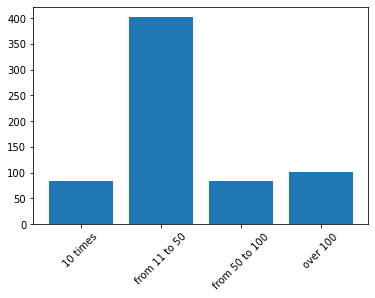

In [28]:
occ  = ["10 times", "from 11 to 50", "from 50 to 100", "over 100"]
data = [rep_10, rep_11_50, rep_50_100, over_100]

occ_dict = dict(zip(occ, data))

plt.bar(range(len(occ_dict)), list(occ_dict.values()), align='center')
plt.xticks(range(len(occ_dict)), list(occ_dict.keys()), rotation = 45)

## 1.2f

In [29]:
# Note this is only for the 20 most used words

temp_df_dict = {}

for i, j in most_used_words:
    temp_df_dict[i] = j

rank_list = []
for r, n in enumerate(temp_df_dict):
    rank_list.append((r+1) * temp_df_dict[n])

#zips
    
df["zips"] = rank_list
df.head()

,word,freq,zips
0,the,3662,3662
1,and,2981,5962
2,a,1787,5361
3,to,1697,6788
4,of,1424,7120


<AxesSubplot:>

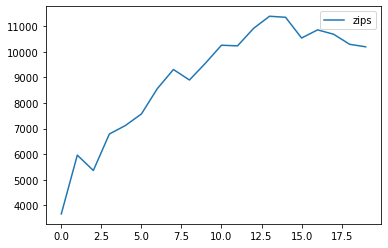

In [30]:
#plt.title("Zip's law")
#df.plot(x = "zips") # Change to x_direction
df.plot(y = "zips")

I am not quite sure this is right. I saw some other guys get a different plot. It would probably have been a lot more close to the plot in the project description if I was to use the entire dataset (as well as plot along the x-axis, but that's personal preferance) and not just the 20 most common words. But I got some unexpected errors when doing that

# Exercise 2.1

## 2.1a

In [31]:
import nltk
import random
import numpy as np
import scipy as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [32]:
from nltk.corpus import movie_reviews

raw_movie_docs = [(movie_reviews.raw(fileid), category) for
                   category in movie_reviews.categories() for fileid in
                   movie_reviews.fileids(category)]

#movie_reviews.raw(fileid)

In [33]:
random.seed(2111)
random.shuffle(raw_movie_docs)
movie_test = raw_movie_docs[:200]
movie_dev  = raw_movie_docs[200:]

In [34]:
#train_data, dev_test_data, train_tests, train_target = train_test_split(x, y, test_size=0.2)
#len(movie_dev) #1800 - 200
                # train_dev_data = 1600, dev_test_data = 200
train_data = movie_dev[200:] 
dev_test_data  = movie_dev[:200]

print(len(train_data), len(dev_test_data))

1600 200


In [35]:
train_texts  = list()
train_target = list()

for i, j in train_data:
    train_texts.append(i)
    train_target.append(j)
    
dev_test_texts  = list()
dev_test_target = list()

for i, j in dev_test_data:
    dev_test_texts.append(i)
    dev_test_target.append(j)

In [36]:
v = CountVectorizer()
v.fit(train_texts)

CountVectorizer()

In [37]:
train_vectors = v.transform(train_texts)
dev_test_vectors = v.transform(dev_test_texts)

clf = MultinomialNB()
clf.fit(train_vectors, train_target)

MultinomialNB()

In [38]:
#dev_test_texts[14]
clf.predict(dev_test_vectors)

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'pos',

In [39]:
clf.score(dev_test_vectors, dev_test_target)

0.78

# 2.1b

In [40]:
binary       = [False, True]
n_gram_range = [(1,1), (1,2), (1,3)]

accuracy_score = {binary[0]: list(), binary[1]: list()}

"""
accuracy_score = dict()
for i in range(len(binary)):
    accuracy_score[binary[i]].append(list())
"""

def run_1b(ngram_range, binary):
    
    v = CountVectorizer(ngram_range = ngram_range, binary = binary)
    v.fit(train_texts)
    
    train_vectors = v.transform(train_texts)
    dev_test_vectors = v.transform(dev_test_texts)
    
    clf = MultinomialNB()
    
    clf.fit(train_vectors, train_target)
    clf.predict(dev_test_vectors)
    
    return clf.score(dev_test_vectors, dev_test_target)

for i in binary:
    for j in n_gram_range:
        accuracy_score[i].append(run_1b(j, i))

In [41]:
data = list()
for i in range(len(n_gram_range)):
    data.append([accuracy_score[binary[0]][i], accuracy_score[binary[1]][i]])

table = dict(zip(n_gram_range, data))

df = pd.DataFrame(data = table, columns = n_gram_range)
df.index = [False, True]
df

,"(1, 1)","(1, 2)","(1, 3)"
False,0.780000,0.805000,0.805000
True,0.755000,0.805000,0.840000


## 2.2a

In [42]:
def nine_fold_cv():
    
    accuracy_score = list()
    
    for i in range(1, 10):
        #"""
        end_slice = i * 2*100
        start_slice = end_slice - 200
        
        dev_test_data = movie_dev[start_slice:end_slice]
        
        if start_slice == 0:
            train_data = movie_dev[end_slice:]
        #elif start_slice not in [0, 1600]:
        #    train_data = movie_dev[:start_slice] + movie_dev[end_slice:]
        elif start_slice == 1600:
            train_data = movie_dev[:start_slice]
        else:
            train_data = movie_dev[:start_slice] + movie_dev[end_slice:]
        #"""
        train_texts  = list()
        train_target = list()

        for x, y in train_data:
            train_texts.append(x)
            train_target.append(y)

        dev_test_texts  = list()
        dev_test_target = list()

        for x, y in dev_test_data:
            dev_test_texts.append(x)
            dev_test_target.append(y)
                  
        v = CountVectorizer(ngram_range = (1,3), binary = True)
        v.fit(train_texts)
        
        train_vectors = v.transform(train_texts)
        dev_test_vectors = v.transform(dev_test_texts)
        
        clf = MultinomialNB()
        
        clf.fit(train_vectors, train_target)
        clf.predict(dev_test_vectors)
        
        accuracy = clf.score(dev_test_vectors, dev_test_target)
        accuracy_score.append(accuracy)
        
        print(accuracy)
    final = f"""
      Mean:         {np.mean(accuracy_score)}, 
    Variance:       {np.var(accuracy_score)}, 
Standard Deviation: {np.std(accuracy_score)}
            """
    
    return final

In [43]:
print(nine_fold_cv())

0.84
0.83
0.815
0.82
0.9
0.87
0.86
0.87
0.84

      Mean:         0.8494444444444444, 
    Variance:       0.0006802469135802481, 
Standard Deviation: 0.02608154354290114
            


# 2.2b

In [44]:
def log_nine_fold_cv():
    
    accuracy_score = list()
    
    for i in range(1, 10):
        #"""
        end_slice = i * 2*100
        start_slice = end_slice - 200
        
        dev_test_data = movie_dev[start_slice:end_slice]
        
        if start_slice == 0:
            train_data = movie_dev[end_slice:]
        #elif start_slice not in [0, 1600]:
        #    train_data = movie_dev[:start_slice] + movie_dev[end_slice:]
        elif start_slice == 1600:
            train_data = movie_dev[:start_slice]
        else:
            train_data = movie_dev[:start_slice] + movie_dev[end_slice:]
        #"""
        train_texts  = list()
        train_target = list()

        for x, y in train_data:
            train_texts.append(x)
            train_target.append(y)

        dev_test_texts  = list()
        dev_test_target = list()

        for x, y in dev_test_data:
            dev_test_texts.append(x)
            dev_test_target.append(y)
                  
        v = CountVectorizer(ngram_range = (1,1), binary = True)
        v.fit(train_texts)
        
        train_vectors = v.transform(train_texts)
        dev_test_vectors = v.transform(dev_test_texts)
        
        clf = LogisticRegression(solver='liblinear')
        
        clf.fit(train_vectors, train_target)
        clf.predict(dev_test_vectors)
        
        accuracy = clf.score(dev_test_vectors, dev_test_target)
        accuracy_score.append(accuracy)
        
        print(accuracy)
    final = f"""
Mean: {np.mean(accuracy_score)}, 
Variance: {np.var(accuracy_score)}, 
Standard Deviation: {np.std(accuracy_score)}
            """
    
    return final

In [45]:
print(log_nine_fold_cv())

0.81
0.845
0.85
0.86
0.89
0.855
0.89
0.865
0.855

Mean: 0.8577777777777779, 
Variance: 0.0005172839506172836, 
Standard Deviation: 0.022743877211620793
            


Even when picking point `(1,1)`, the Logistic Regression Classifier (LRC) performed better than the Multinomial Naive Bayes (MNB). There are some dofferences on how these algorithms function. The LRC is a descriminative classifier, whilest MNB is a generative classifier. 